In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Save latitudes for use in analysis
lats = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lats.append(lat_lng[0])
        
# Print the city count to confirm sufficient count
len(cities)

# Output file
cities_df = pd.DataFrame(cities, columns=["Cities"])
cities_df.to_csv(output_data_file, index=False)

In [50]:
## Perform API Calls

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Setup lists for data
temp = []
humidity = []
clouds = []
wind_speed = []
record_num = 0
error_count = 0

# TEST TEST TEST TEST
#test_cities = cities[:50]
#test_lats = lats[:50]
# TEST TEST TEST TEST

# Loop through the cities
print("Beginning Data Retrieval")
print("------------------------")

# Loop through cities
for city in cities:
    city_query = "&q=" + city
    url = base_url + city_query
    print(f'Processing Record {record_num} of Set 1 | {city}')
    print(url)
    
    # increment
    record_num += 1
    
    try:
        # Get data from OpenWeatherMap
        weather_data = requests.get(url).json()
    
        # Save data
        temp.append(weather_data["main"]["temp_max"])
        humidity.append(weather_data["main"]["humidity"])
        clouds.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])

    except KeyError:
        print(f'\nCITY NOT FOUND, skipping {city}\n')
        
        # Keep track of total number of errors
        error_count += 1
                
        # Nullify not found city rows
        temp.append(np.nan)
        humidity.append(np.nan)
        clouds.append(np.nan)
        wind_speed.append(np.nan)

    
print("------------------------")
print("Ending Data Retrieval")
print(f'\nTotal Errors: {error_count}')

data_dict = {"City": cities, "Lat": lats, "Temp": temp, "Humidity": humidity, "Clouds": clouds, "Wind_Speed": wind_speed}
city_weather_df = pd.DataFrame(data_dict)

# Drop the not found cities
city_weather_df.dropna(inplace=True)

city_weather_df.head()

Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=ushuaia
Processing Record 1 of Set 1 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=yar-sale
Processing Record 2 of Set 1 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=esperance
Processing Record 3 of Set 1 | iquique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=iquique
Processing Record 4 of Set 1 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=coihaique
Processing Record 5 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=kapaa
Processing Record 6 of Set 1 | fairbanks
htt

Processing Record 53 of Set 1 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=bathsheba
Processing Record 54 of Set 1 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=ancud
Processing Record 55 of Set 1 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=verkhoyansk
Processing Record 56 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=tuktoyaktuk
Processing Record 57 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=mataura
Processing Record 58 of Set 1 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=cururupu
Processing Record 59 of Set 1 | illoqqortoormiut
http://api.openweathermap.o

Processing Record 106 of Set 1 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=saleaula

CITY NOT FOUND, skipping saleaula

Processing Record 107 of Set 1 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=port lincoln
Processing Record 108 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=puerto ayora
Processing Record 109 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=georgetown
Processing Record 110 of Set 1 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=los llanos de aridane
Processing Record 111 of Set 1 | merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=mera

Processing Record 158 of Set 1 | korablino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=korablino
Processing Record 159 of Set 1 | cazaje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=cazaje

CITY NOT FOUND, skipping cazaje

Processing Record 160 of Set 1 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=vestmannaeyjar
Processing Record 161 of Set 1 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=ambon
Processing Record 162 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=chuy
Processing Record 163 of Set 1 | kargapolye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=kargapolye

CITY NOT FOUND, skipping kargapolye

Proc

Processing Record 210 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=saldanha
Processing Record 211 of Set 1 | buariki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=buariki

CITY NOT FOUND, skipping buariki

Processing Record 212 of Set 1 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=lagoa
Processing Record 213 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=chokurdakh
Processing Record 214 of Set 1 | hangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=hangu
Processing Record 215 of Set 1 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=saint anthony
Processing Record 216 of Set 1 | nalut
ht

Processing Record 263 of Set 1 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=nelson bay
Processing Record 264 of Set 1 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=salalah
Processing Record 265 of Set 1 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=bubaque
Processing Record 266 of Set 1 | zvishavane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=zvishavane
Processing Record 267 of Set 1 | katras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=katras
Processing Record 268 of Set 1 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=isangel
Processing Record 269 of Set 1 | rio grande
http://api.openweathermap.org/data

Processing Record 315 of Set 1 | grand island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=grand island
Processing Record 316 of Set 1 | huilong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=huilong
Processing Record 317 of Set 1 | tucumcari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=tucumcari
Processing Record 318 of Set 1 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=cherskiy
Processing Record 319 of Set 1 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=attawapiskat

CITY NOT FOUND, skipping attawapiskat

Processing Record 320 of Set 1 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=sorland
Processing Record 321 

Processing Record 366 of Set 1 | hirado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=hirado
Processing Record 367 of Set 1 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=santa maria
Processing Record 368 of Set 1 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=cabedelo
Processing Record 369 of Set 1 | lokosovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=lokosovo
Processing Record 370 of Set 1 | wucheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=wucheng
Processing Record 371 of Set 1 | totness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=totness
Processing Record 372 of Set 1 | dorado
http://api.openweathermap.org/data/2.5

Processing Record 418 of Set 1 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=acarau

CITY NOT FOUND, skipping acarau

Processing Record 419 of Set 1 | taburi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=taburi

CITY NOT FOUND, skipping taburi

Processing Record 420 of Set 1 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=qasigiannguit
Processing Record 421 of Set 1 | miranorte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=miranorte

CITY NOT FOUND, skipping miranorte

Processing Record 422 of Set 1 | primore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=primore

CITY NOT FOUND, skipping primore

Processing Record 423 of Set 1 | ust-karsk
http://api.openweathermap.org/data/2.5/weathe

Processing Record 469 of Set 1 | andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=andenes

CITY NOT FOUND, skipping andenes

Processing Record 470 of Set 1 | birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=birjand
Processing Record 471 of Set 1 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=aswan
Processing Record 472 of Set 1 | kinkala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=kinkala
Processing Record 473 of Set 1 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=carutapera
Processing Record 474 of Set 1 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=tumannyy

CITY NOT FOUND, skipping tumannyy

Processing Re

Processing Record 521 of Set 1 | nevelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=nevelsk
Processing Record 522 of Set 1 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=taoudenni
Processing Record 523 of Set 1 | artyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=artyk

CITY NOT FOUND, skipping artyk

Processing Record 524 of Set 1 | xiongyue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=xiongyue
Processing Record 525 of Set 1 | melfort
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=melfort
Processing Record 526 of Set 1 | campeche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=campeche
Processing Record 527 of Set 1 | zhaotong
http://ap

Processing Record 574 of Set 1 | malko tarnovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=malko tarnovo
Processing Record 575 of Set 1 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=richards bay
Processing Record 576 of Set 1 | haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=haibowan

CITY NOT FOUND, skipping haibowan

Processing Record 577 of Set 1 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=san cristobal
Processing Record 578 of Set 1 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=waipawa
Processing Record 579 of Set 1 | kathmandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f0754d6949b71753ee0ebe9aa1fa42e&q=kathmandu
Processing R

,City,Lat,Temp,Humidity,Clouds,Wind_Speed
0,ushuaia,-83.938910,33.80,80.0,90.0,11.41
1,yar-sale,71.782477,62.13,71.0,36.0,15.19
2,esperance,-31.027819,78.80,88.0,20.0,8.05
3,iquique,-20.258554,59.00,72.0,90.0,6.93
4,coihaique,-43.996084,30.20,100.0,0.0,3.36


Text(0.5,1,'City Latitude vs Max Temperature (8/5/2018)')

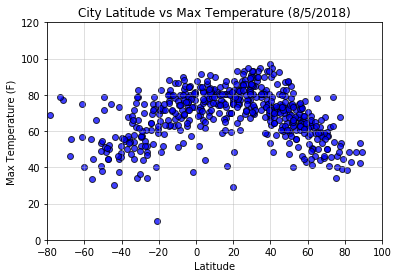

In [51]:
# Scatter Plots
# Temperature (F) vs. Latitude
x_axis = city_weather_df['Lat']
data_to_plot = city_weather_df['Temp']

plt.scatter(x_axis, data_to_plot, marker="o", c='b', edgecolors="black", alpha=0.75, label="Temp (F)")

# Save Figure
plt.savefig("temp_vs_Latitude_plot.png", bbox_inches="tight")

# Incorporate the other graph properties
plt.ylim(0, 120)
plt.xlim(-80, 100)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (8/5/2018)")

In [ ]:
# Show plot
plt.show()

Text(0.5,1,'City Latitude vs Humidity (8/5/2018)')

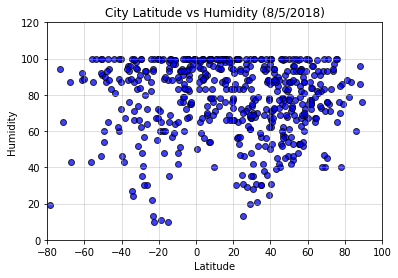

In [52]:
# Scatter Plots
# Humidity vs. Latitude
x_axis = city_weather_df['Lat']
data_to_plot = city_weather_df['Humidity']

plt.scatter(x_axis, data_to_plot, marker="o", c='b', edgecolors="black", alpha=0.75, label="Temp (F)")

# Save Figure
plt.savefig("humidity_vs_Latitude_plot.png", bbox_inches="tight")

# Incorporate the other graph properties
plt.ylim(0, 120)
plt.xlim(-80, 100)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (8/5/2018)")


In [ ]:
# Show plot
plt.show()

Text(0.5,1,'City Latitude vs Cloudiness (8/5/2018)')

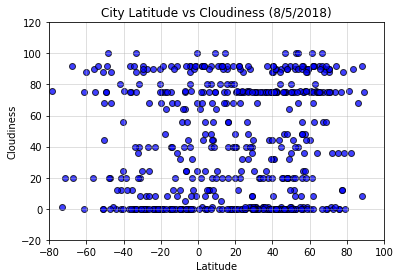

In [53]:
# Scatter Plots
# Cloudiness vs. Latitude
x_axis = city_weather_df['Lat']
data_to_plot = city_weather_df['Clouds']

plt.scatter(x_axis, data_to_plot, marker="o", c='b', edgecolors="black", alpha=0.75, label="Temp (F)")

# Save Figure
plt.savefig("clouds_vs_Latitude_plot.png", bbox_inches="tight")

# Incorporate the other graph properties
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (8/5/2018)")


In [ ]:
# Show plot
plt.show()

Text(0.5,1,'City Latitude vs Wind Speed (8/5/2018)')

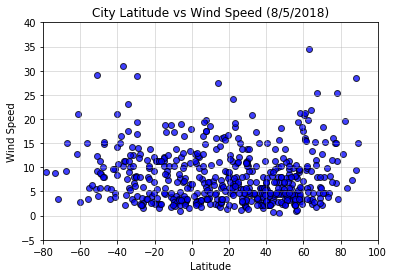

In [54]:
# Scatter Plots
# Wind Speed vs. Latitude
x_axis = city_weather_df['Lat']
data_to_plot = city_weather_df['Wind_Speed']

plt.scatter(x_axis, data_to_plot, marker="o", c='b', edgecolors="black", alpha=0.75, label="Temp (F)")

# Save Figure
plt.savefig("wind_speed_vs_Latitude_plot.png", bbox_inches="tight")

# Incorporate the other graph properties
plt.ylim(-5, 40)
plt.xlim(-80, 100)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (8/5/2018)")


In [ ]:
# Show plot
plt.show()

# Analysis


#### Temperature:
There is (generally) an arch to the data.  However, the peak is around 30° (north). 23.5S and 23.5N is considered the tropics so that makes sense as far as north of the equator. Not so much south. That may be due to lack of cities.  But the majority in the southern region of the tropics is less than in the northern part.

The normal temps for the poles in the summer is 32F (north) and -18F (south). In the winter it's -40F (north) and -76F (south). The temps for the north pole (+90°) seems pretty close to the summer normal. The south pole is in winter and the temps are not even close to the normal for winter there.  But there are no points at -90° which makes sense since there are no cities in Antarctica. The most southern city is at -55°, so those plot points to the left of that latitude should be verified. In addition, there are two points that seem cold for the equator (around 40° and 50°). That may be due to the city being in mountains, purhaps.

#### Humidity:
First there are 3 plot points beyond -55° where there are not supposed to be any cities. And there are several plot points near 0° that are low humidity where I would expect high humidity (tropics).  Again, that could be due to altitude.

There is a general bowl shape to the data. I would actually would have expected the bowl to be upside down here, given that the tropics is usually humid jungle (I believe). There are several points between 80-90° that range from 100% to 35%(ish) humidity. But maybe that is due places being cooler? (like side of ice burg?) I know well how warmer air can hold more mositure than cold air because of living most of my life in St. Louis. Anyway, those points should be verified.

#### Cloudiness
"Clouds form when humid air cools enough for water vapor to condense into droplets or ice crystals. The altitude at which this happens depends on the humidity and the rate at which temperature drops with elevation." They also start forming around 12.5 miles above the ground. I don't see how the humidity and temp plots can explain the cloudiness plot. I expect there are other factors involved in cloudiness. How rapidly the air cools as it rises. Another factor in cloud formation are how much (or if) dust, soot, and air pollution is present.

#### Wind Speed:
Wind is created by a difference in pressure going from high to low. Pressure is created by differences in heating the earth. Most of the plot points are below about 12mph (?). There are more above that line in the northern hemisphere and that make sense since its summer in the northern hemisphere.

#### Final Comments:
I already stated that the most southern city on the planet is at -55°. Looking at the closest cities to the north pole, the inhabited ones are at least 20°+ south of the north pole. So anything more than 70° latitude should be verified along with any points less than -55° latitude.

I found it difficult to come up with any conclusions because of the several other factors involved in each of these measurements. Hence the quoting of basic weather stuff. It would be interesting to get historical data and see if these measurements would be different due to climate change. Comparing the tempurature plot to the one in the pdf, it's noticably more scattered (a lot at higher temps) in the current plot.